In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
df = pd.read_csv("C:\\Users\\Diya\\Downloads\\Iris.csv")

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df= df.iloc[:,1:]

In [5]:
species = list(set(df['Species']))

In [6]:
S1= df[df['Species']==species[0]]
S2= df[df['Species']==species[1]]
S3= df[df['Species']==species[2]]

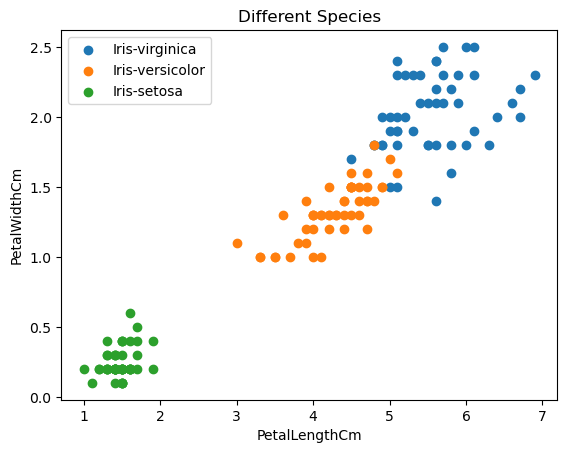

In [7]:
plt.scatter(S1['PetalLengthCm'],S1['PetalWidthCm'], label=species[0])
plt.scatter(S2['PetalLengthCm'],S2['PetalWidthCm'], label=species[1])
plt.scatter(S3['PetalLengthCm'],S3['PetalWidthCm'], label=species[2])
plt.title('Different Species')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [8]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:, -1].values 

In [9]:
import random
random_state_value = random.randint(1, 1000)
print(random_state_value)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state_value)

854


In [10]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (105, 4)
Shape of Y_train :  (105,)
Shape of X_test :  (45, 4)
Shape of Y_test :  (45,)


In [11]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [12]:
def euclidean_distance(x_train, x_test):
    dist = 0
    for i in range(len(x_test)):
        dist += (x_test[i] - x_train[i]) ** 2
    return sqrt(dist)

In [13]:
def k_nearest_neighbors(X_train, Y_train, X_test, k):
    dist= [euclidean_distance(x, X_test) for x in X_train]
    k_nearest_indices = np.argsort(dist)[:k]
    labels = [Y_train[i] for i in k_nearest_indices]
    label_counts = {}
    for label in set(labels):
        label_counts[label] = labels.count(label)

    y_pred = max(label_counts, key=label_counts.get)
    return y_pred

In [14]:
def predictor(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, xtest, k) for xtest in X_test]
    return predictions

In [15]:
def accuracy(y_test, y_pred):
    correct=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            correct+=1
    accuracy= correct/len(y_test)
    return accuracy

In [16]:
Y_test_2= Y_test.tolist()

In [17]:
#from scratch
k_values = range(1, 22)
acc= []
for k in k_values:
    y_pred = predictor(X_train, Y_train, X_test, k)
    acc.append(accuracy(Y_test_2, y_pred))

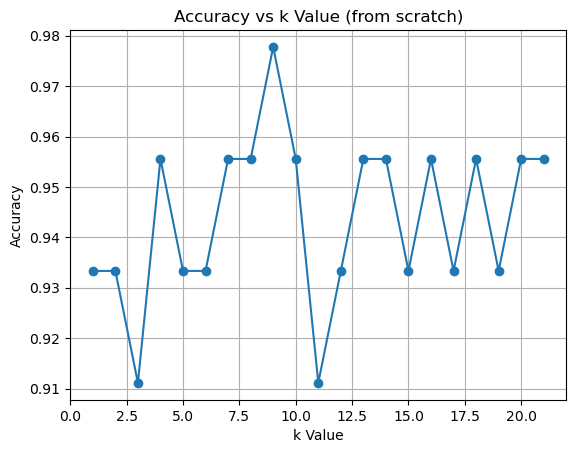

In [18]:
#from scratch
plt.plot(k_values, acc, marker='o')
plt.title('Accuracy vs k Value (from scratch)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [19]:
#As we can see, accuracy reaches a maximum value as k increases and then decreases further

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
#using sklearn
acc_sklearn = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    y_pred_2 = knn_model.predict(X_test)
    acc_sklearn.append(accuracy_score(Y_test, y_pred_2))

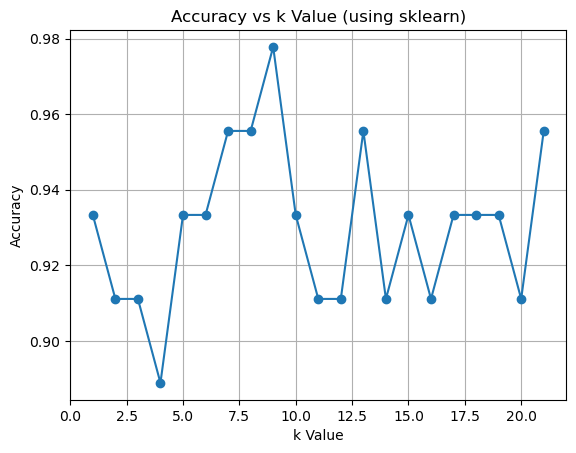

In [22]:
#using sklearn
plt.plot(k_values, acc_sklearn, marker='o')
plt.title('Accuracy vs k Value (using sklearn)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()